#### 1: Data Loading and Preprocessing

In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
world_cups = pd.read_csv('WorldCups.csv')
world_cup_matches = pd.read_csv('WorldCupMatches.csv')
world_cup_players = pd.read_csv('WorldCupPlayers.csv')

In [3]:
# Display the first few rows of each dataset
print("World Cups Dataset:")
print(world_cups.head())

World Cups Dataset:
   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  


In [4]:
print("\nWorld Cup Matches Dataset:")
print(world_cup_matches.head())


World Cup Matches Dataset:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0              

In [5]:
print("\nWorld Cup Players Dataset:")
print(world_cup_players.head())


World Cup Players Dataset:
   RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN  


In [6]:
# Data Cleaning
# Convert 'Attendance' to string to replace '.' and then to integer
world_cups['Attendance'] = world_cups['Attendance'].astype(str).str.replace('.', '').astype(float).astype('Int64')

# Handle missing values in 'Year' column of world_cup_matches before conversion
# Check which values are non-integer and replace them with NaN
world_cup_matches['Year'] = pd.to_numeric(world_cup_matches['Year'], errors='coerce').astype('Int64')

# Convert 'Datetime' in world_cup_matches to datetime object
world_cup_matches['Datetime'] = pd.to_datetime(world_cup_matches['Datetime'], errors='coerce')

In [7]:
# Display the first few rows of each dataset after cleaning
print("\nWorld Cups Dataset:")
print(world_cups.head())

print("\nWorld Cup Matches Dataset:")
print(world_cup_matches.head())

print("\nWorld Cup Players Dataset:")
print(world_cup_players.head())


World Cups Dataset:
   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  
0           70              13             18      590549  
1           70              16             17      363000  
2           84              15             18      375700  
3           88              13             22     1045246  
4          140              16             26      768607  

World Cup Matches Dataset:
   Year            Datetime    Stage         Stadium         City  \
0  1930 1930-07-13 15:00:00  Group 1         Pocitos  Montevideo    
1  1930 1930-0

#### 2: Exploratory Data Analysis (EDA)

In [8]:
# Summary Statistics
print("World Cups Dataset Summary:")
print(world_cups.describe())

print("\nWorld Cup Matches Dataset Summary:")
print(world_cup_matches.describe())

print("\nWorld Cup Players Dataset Summary:")
print(world_cup_players.describe())

World Cups Dataset Summary:
              Year  GoalsScored  QualifiedTeams  MatchesPlayed      Attendance
count    20.000000    20.000000       20.000000      20.000000            20.0
mean   1974.800000   118.950000       21.250000      41.800000      1872882.35
std      25.582889    32.972836        7.268352      17.218717  1071842.147758
min    1930.000000    70.000000       13.000000      17.000000        363000.0
25%    1957.000000    89.000000       16.000000      30.500000        874831.5
50%    1976.000000   120.500000       16.000000      38.000000       1734864.0
75%    1995.000000   145.250000       26.000000      55.000000      2725172.75
max    2014.000000   171.000000       32.000000      64.000000       3587538.0

World Cup Matches Dataset Summary:
              Year                       Datetime  Home Team Goals  \
count        852.0                            842       852.000000   
mean   1985.089202  1985-06-18 02:28:30.570071296         1.811033   
min         193

In [9]:
# Overview of World Cup Winners
winners = world_cups['Winner'].value_counts()
print("\nWorld Cup Winners Count:")
print(winners)


World Cup Winners Count:
Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64


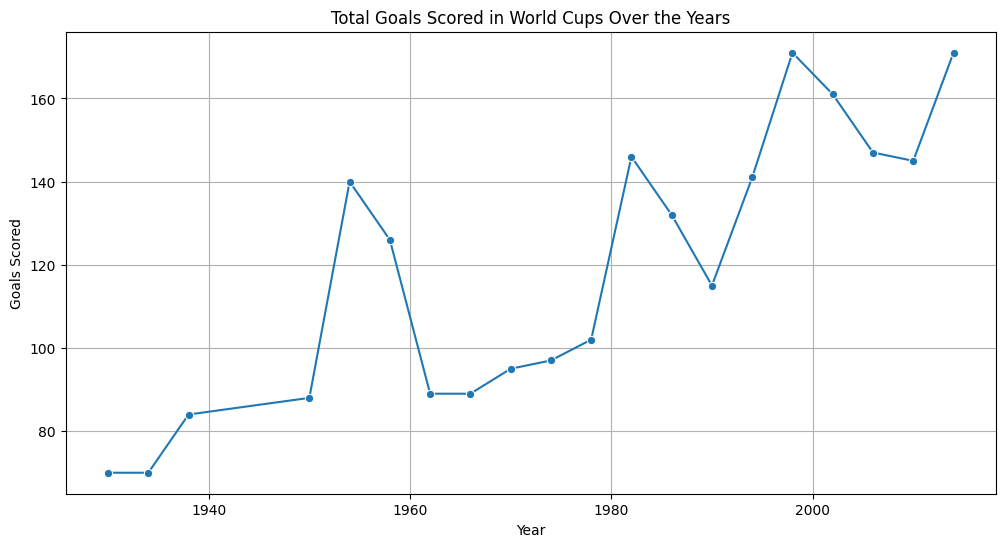

In [10]:
# Goals scored in each World Cup
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups, x='Year', y='GoalsScored', marker='o')
plt.title('Total Goals Scored in World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

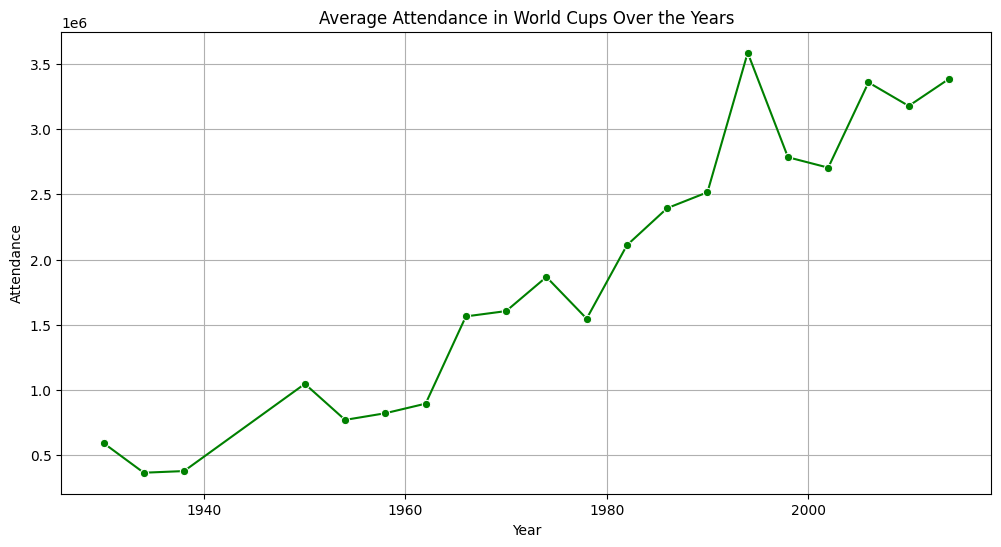

In [11]:
# Average attendance over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups, x='Year', y='Attendance', marker='o', color='green')
plt.title('Average Attendance in World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

C:\Users\administor\AppData\Local\Temp\ipykernel_14696\2138126463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=world_cups, x='Year', y='MatchesPlayed', palette='viridis')


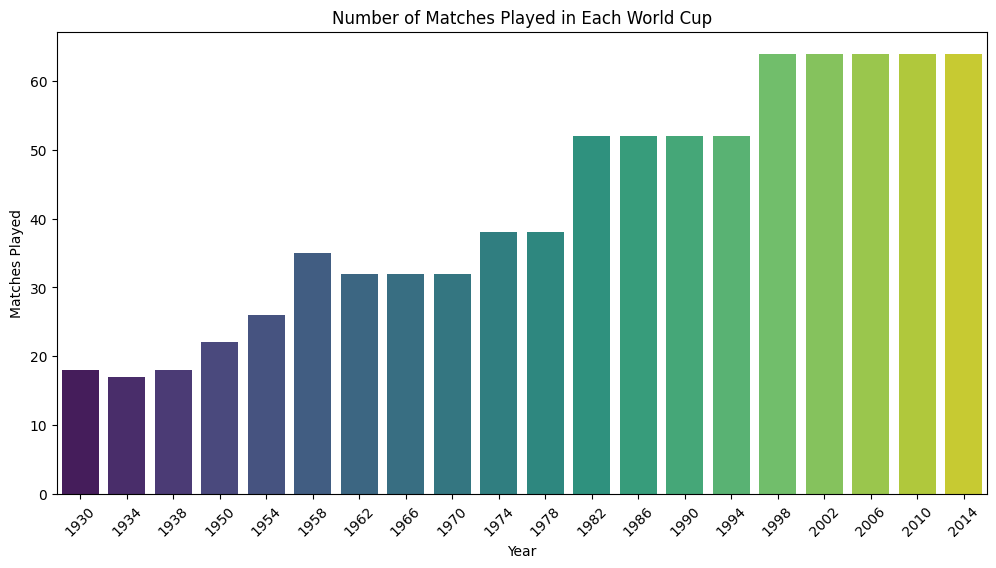

In [12]:
# Number of matches played in each World Cup
plt.figure(figsize=(12, 6))
sns.barplot(data=world_cups, x='Year', y='MatchesPlayed', palette='viridis')
plt.title('Number of Matches Played in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.xticks(rotation=45)
plt.show()

#### 3: Detailed Analysis

In [13]:
# Performance of Winning Teams
winning_teams_performance = world_cups[['Year', 'Winner', 'GoalsScored', 'MatchesPlayed']]

# Print the performance data of winning teams
print("\nPerformance of Winning Teams:")
print(winning_teams_performance)


Performance of Winning Teams:
    Year      Winner  GoalsScored  MatchesPlayed
0   1930     Uruguay           70             18
1   1934       Italy           70             17
2   1938       Italy           84             18
3   1950     Uruguay           88             22
4   1954  Germany FR          140             26
5   1958      Brazil          126             35
6   1962      Brazil           89             32
7   1966     England           89             32
8   1970      Brazil           95             32
9   1974  Germany FR           97             38
10  1978   Argentina          102             38
11  1982       Italy          146             52
12  1986   Argentina          132             52
13  1990  Germany FR          115             52
14  1994      Brazil          141             52
15  1998      France          171             64
16  2002      Brazil          161             64
17  2006       Italy          147             64
18  2010       Spain          145     

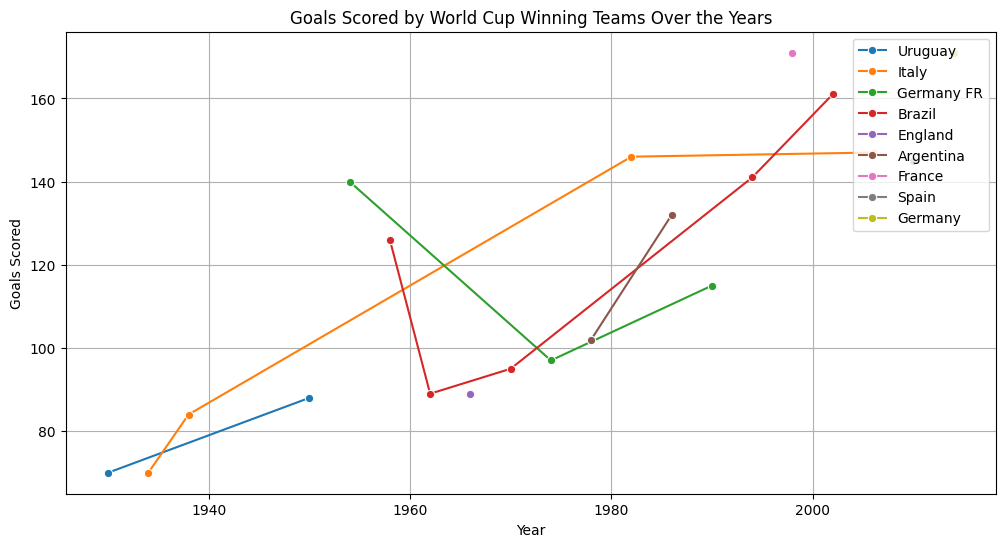

In [14]:
# Visualize goals scored by winning teams over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=winning_teams_performance, x='Year', y='GoalsScored', marker='o', hue='Winner')
plt.title('Goals Scored by World Cup Winning Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

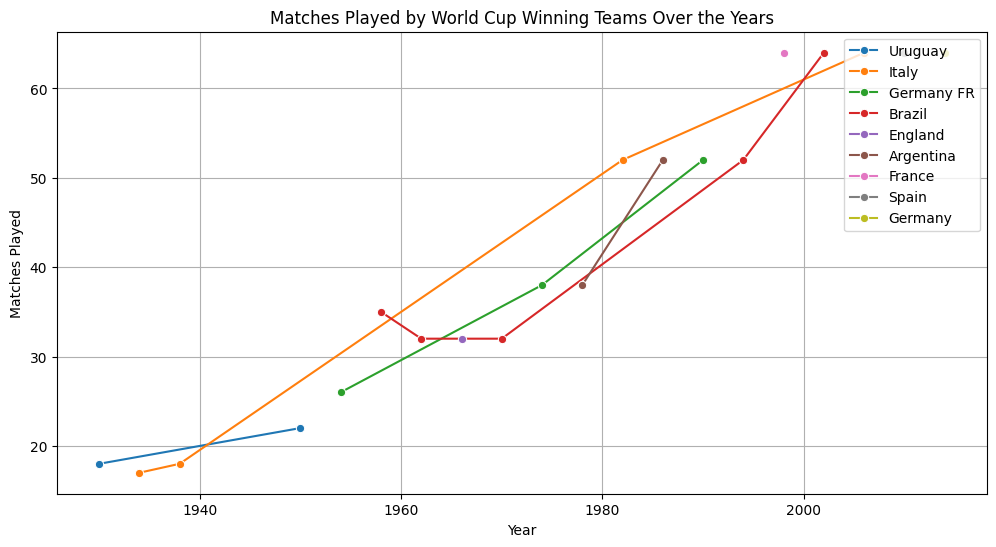

In [15]:
# Analyze matches played by winning teams over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=winning_teams_performance, x='Year', y='MatchesPlayed', marker='o', hue='Winner')
plt.title('Matches Played by World Cup Winning Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

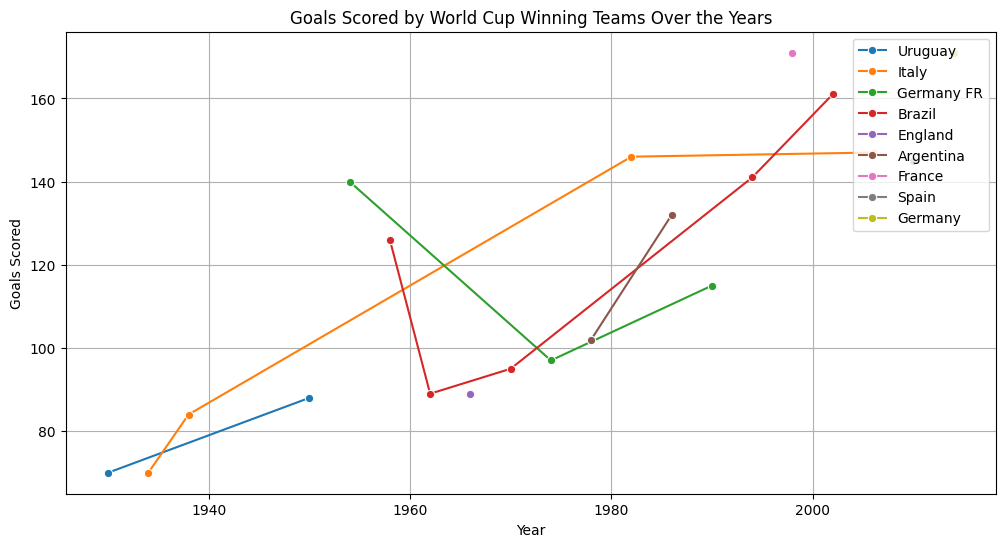

In [16]:
# Investigate goal scoring trends for winners
plt.figure(figsize=(12, 6))
sns.lineplot(data=winning_teams_performance, x='Year', y='GoalsScored', marker='o', hue='Winner')
plt.title('Goals Scored by World Cup Winning Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

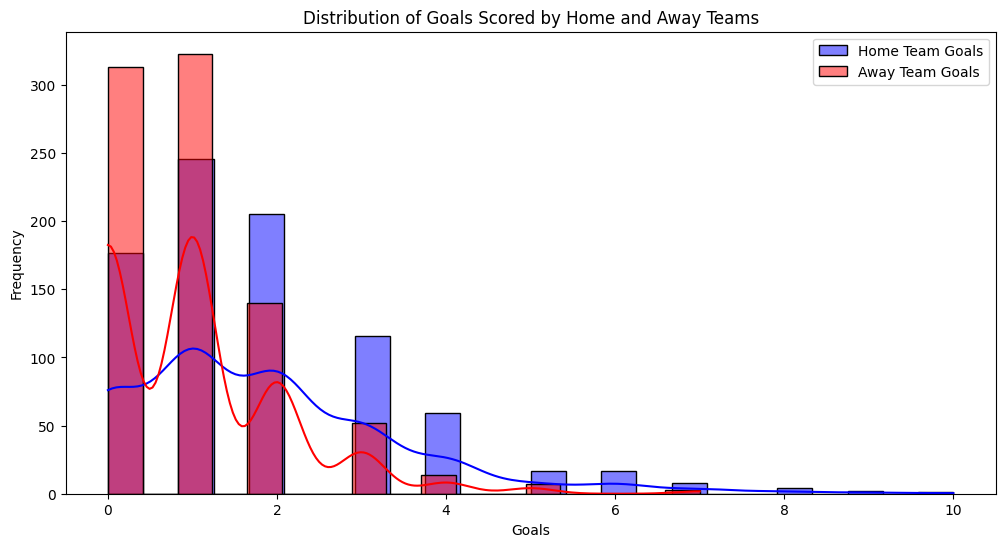

In [17]:
# Analyze home vs away team performance in matches
world_cup_matches['TotalGoals'] = world_cup_matches['Home Team Goals'] + world_cup_matches['Away Team Goals']

plt.figure(figsize=(12, 6))
sns.histplot(world_cup_matches['Home Team Goals'], color='blue', label='Home Team Goals', kde=True)
sns.histplot(world_cup_matches['Away Team Goals'], color='red', label='Away Team Goals', kde=True)
plt.title('Distribution of Goals Scored by Home and Away Teams')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

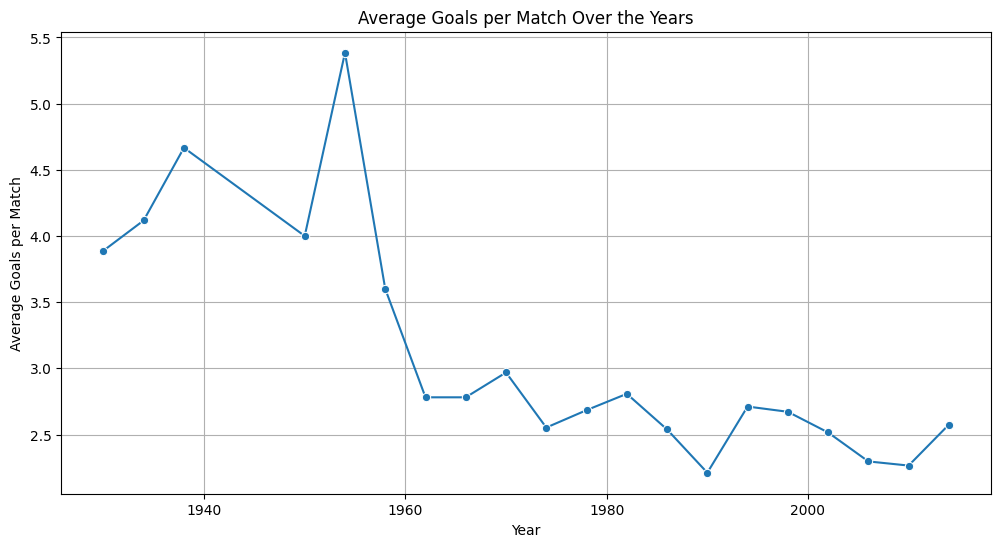

In [18]:
# Average goals per match over the years
average_goals_per_match = world_cup_matches.groupby('Year')['TotalGoals'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_goals_per_match.index, y=average_goals_per_match.values, marker='o')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.grid(True)
plt.show()

C:\Users\administor\AppData\Local\Temp\ipykernel_14696\1335085009.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='magma')


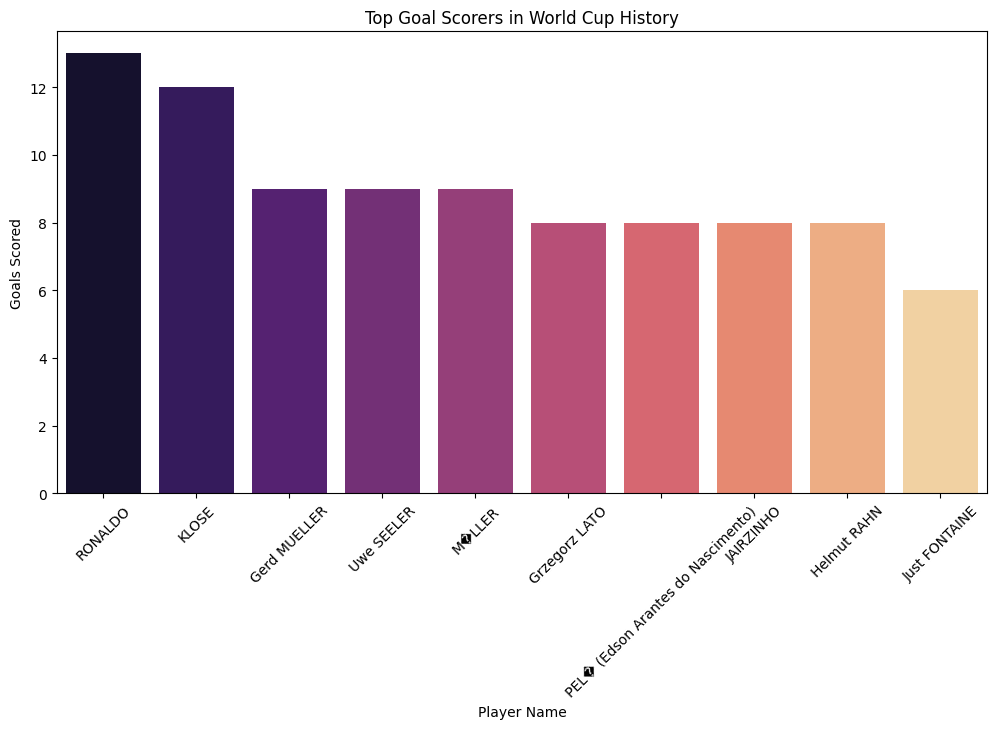

In [19]:
# Top goal scorers in World Cup history
top_scorers = world_cup_players[world_cup_players['Event'].str.contains('G', na=False)]
top_scorers = top_scorers['Player Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='magma')
plt.title('Top Goal Scorers in World Cup History')
plt.xlabel('Player Name')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()

#### 4: Visualizations

C:\Users\administor\AppData\Local\Temp\ipykernel_14696\3523645643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=world_cups, x='Winner', order=world_cups['Winner'].value_counts().index, palette='coolwarm')


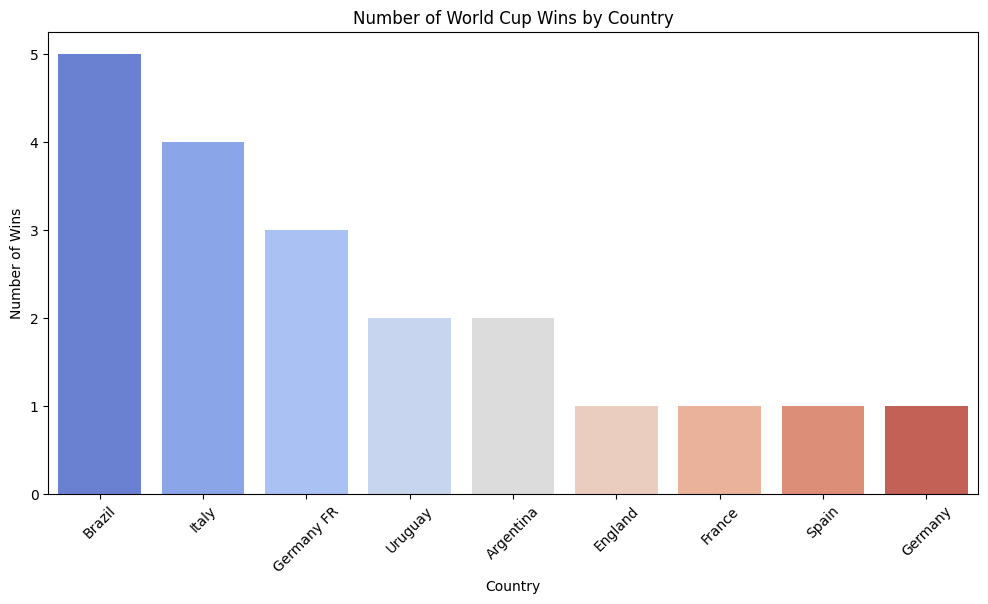

In [20]:
# Number of World Cups won by each country
plt.figure(figsize=(12, 6))
sns.countplot(data=world_cups, x='Winner', order=world_cups['Winner'].value_counts().index, palette='coolwarm')
plt.title('Number of World Cup Wins by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

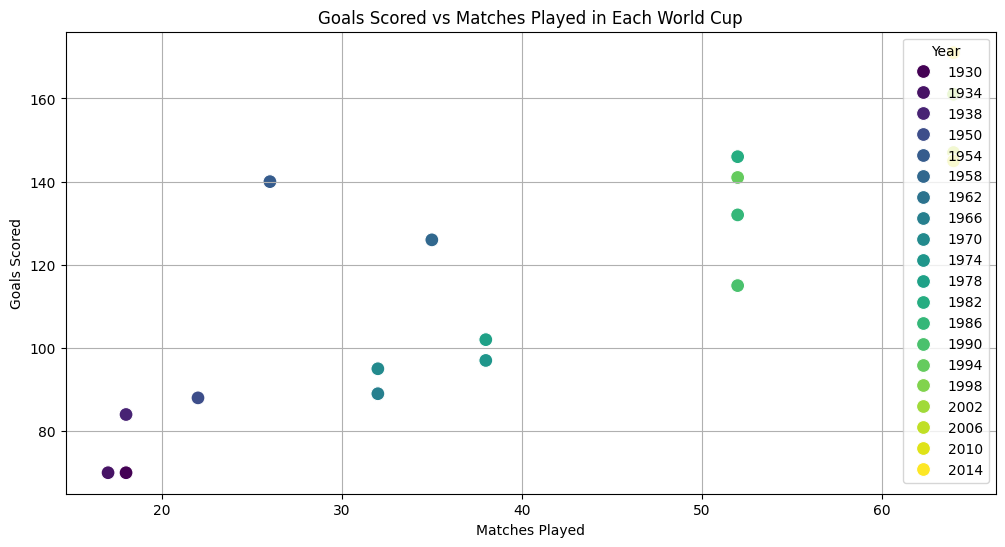

In [21]:
# Goals vs Matches Played in each World Cup
plt.figure(figsize=(12, 6))
sns.scatterplot(data=world_cups, x='MatchesPlayed', y='GoalsScored', hue='Year', palette='viridis', s=100, legend='full')
plt.title('Goals Scored vs Matches Played in Each World Cup')
plt.xlabel('Matches Played')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.legend(loc='upper right', title='Year')
plt.show()

#### 5: Additional Analysis

#### Home Advantage Analysis

C:\Users\administor\AppData\Local\Temp\ipykernel_14696\1146706795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_nations_performance['Host_Won'] = host_nations_performance.apply(lambda row: row['Country'] == row['Winner'], axis=1)
C:\Users\administor\AppData\Local\Temp\ipykernel_14696\1146706795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_nations_performance['Host_Runners_Up'] = host_nations_performance.apply(lambda row: row['Country'] == row['Runners-Up'], axis=1)
C:\Users\administor

Number of times host nation won the World Cup: 5
Number of times host nation was runner-up: 2


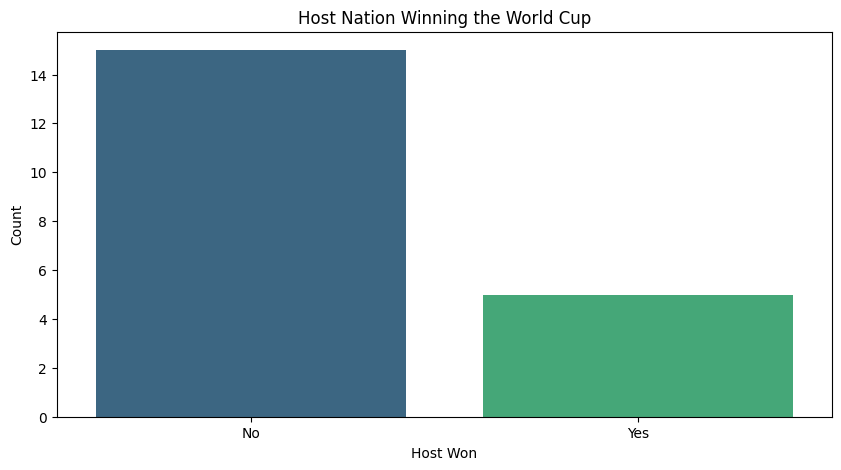

In [22]:
# Analyze performance of host nations
host_nations_performance = world_cups[['Year', 'Country', 'Winner', 'Runners-Up']]

# Check if the host country reached the final or won the tournament
host_nations_performance['Host_Won'] = host_nations_performance.apply(lambda row: row['Country'] == row['Winner'], axis=1)
host_nations_performance['Host_Runners_Up'] = host_nations_performance.apply(lambda row: row['Country'] == row['Runners-Up'], axis=1)

# Count the number of times the host nation won or was a runner-up
host_wins = host_nations_performance['Host_Won'].sum()
host_runners_up = host_nations_performance['Host_Runners_Up'].sum()

print(f"Number of times host nation won the World Cup: {host_wins}")
print(f"Number of times host nation was runner-up: {host_runners_up}")

# Visualize host nation performance
plt.figure(figsize=(10, 5))
sns.countplot(data=host_nations_performance, x='Host_Won', palette='viridis')
plt.title('Host Nation Winning the World Cup')
plt.xlabel('Host Won')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Goal Distribution in Different Stages

['Group Stage' 'Other' 'Knockout Stage' 'Unknown']


C:\Users\administor\AppData\Local\Temp\ipykernel_14696\2433805457.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=world_cup_matches, x='StageCategory', y='TotalGoals', palette='coolwarm')


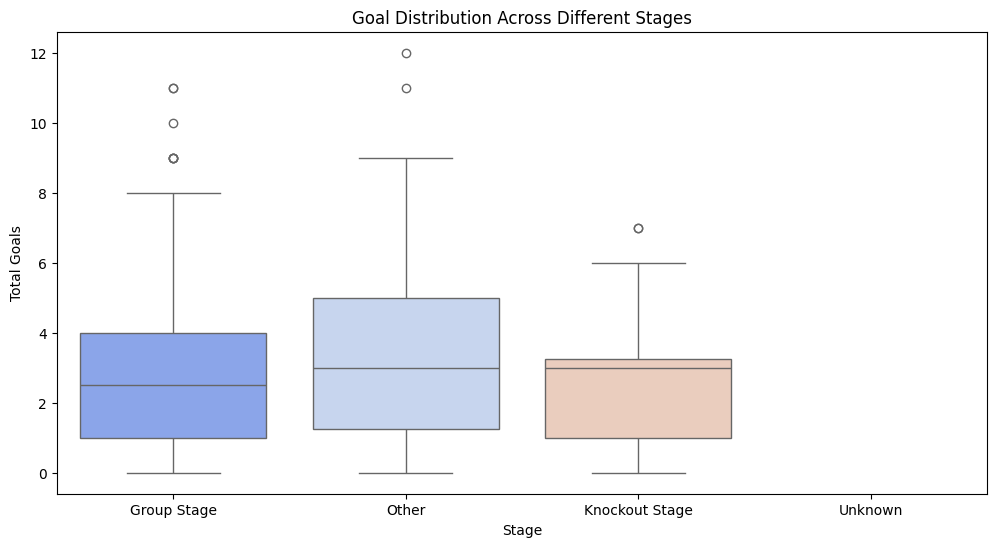

In [23]:
# Modified categorize_stage function to handle NaN and non-string values
def categorize_stage(stage):
    if isinstance(stage, str):
        if 'Group' in stage:
            return 'Group Stage'
        elif 'Round' in stage or 'Final' in stage:
            return 'Knockout Stage'
        else:
            return 'Other'
    else:
        return 'Unknown'

# Apply the modified function to the 'Stage' column
world_cup_matches['StageCategory'] = world_cup_matches['Stage'].apply(categorize_stage)

# Check the unique values in the StageCategory to verify the categorization
print(world_cup_matches['StageCategory'].unique())

# Visualize goal distribution by stage
plt.figure(figsize=(12, 6))
sns.boxplot(data=world_cup_matches, x='StageCategory', y='TotalGoals', palette='coolwarm')
plt.title('Goal Distribution Across Different Stages')
plt.xlabel('Stage')
plt.ylabel('Total Goals')
plt.show()

#### Winning Margins

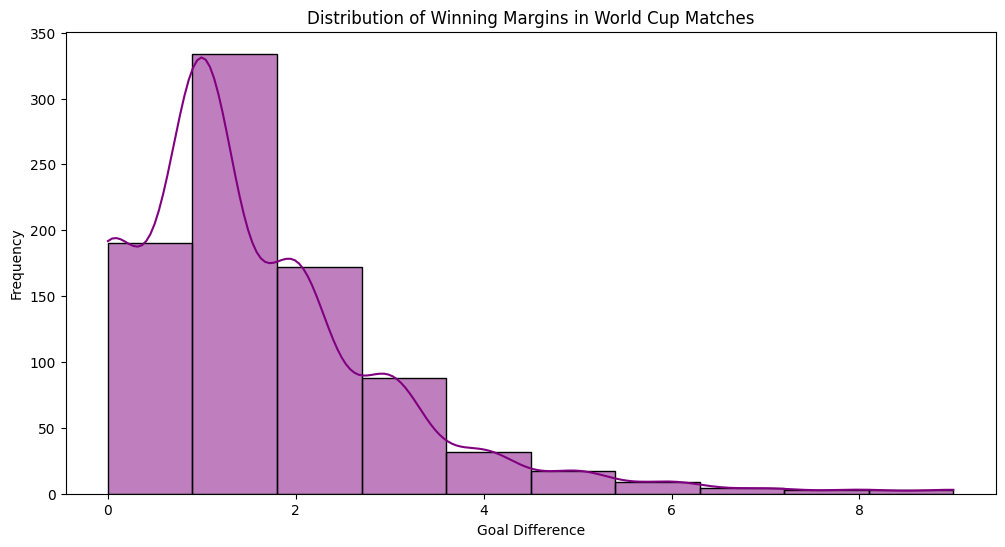

In [24]:
# Calculate goal difference for each match
world_cup_matches['GoalDifference'] = abs(world_cup_matches['Home Team Goals'] - world_cup_matches['Away Team Goals'])

# Visualize distribution of winning margins
plt.figure(figsize=(12, 6))
sns.histplot(world_cup_matches['GoalDifference'], bins=10, kde=True, color='purple')
plt.title('Distribution of Winning Margins in World Cup Matches')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency')
plt.show()

#### Top Scoring Matches

Top 10 Highest Scoring Matches:
     Year            Datetime Home Team Name  Home Team Goals  Away Team Name  \
94   1954 1954-06-26 17:00:00        Austria              7.0     Switzerland   
312  1982 1982-06-15 21:00:00        Hungary             10.0     El Salvador   
87   1954 1954-06-20 16:50:00        Hungary              8.0      Germany FR   
40   1938 1938-06-05 17:30:00         Brazil              6.0          Poland   
105  1958 1958-06-08 19:00:00         France              7.0        Paraguay   
10   1930 1930-07-19 15:00:00      Argentina              6.0          Mexico   
91   1954 1954-06-23 18:00:00     Germany FR              7.0          Turkey   
243  1974 1974-06-18 19:30:00     Yugoslavia              9.0           Zaire   
80   1954 1954-06-17 18:00:00        Hungary              9.0  Korea Republic   
134  1958 1958-06-28 17:00:00         France              6.0      Germany FR   

     Away Team Goals  TotalGoals  
94               5.0        12.0  
312   

C:\Users\administor\AppData\Local\Temp\ipykernel_14696\555395576.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scoring_matches, y='Match', x='TotalGoals', palette='rocket')


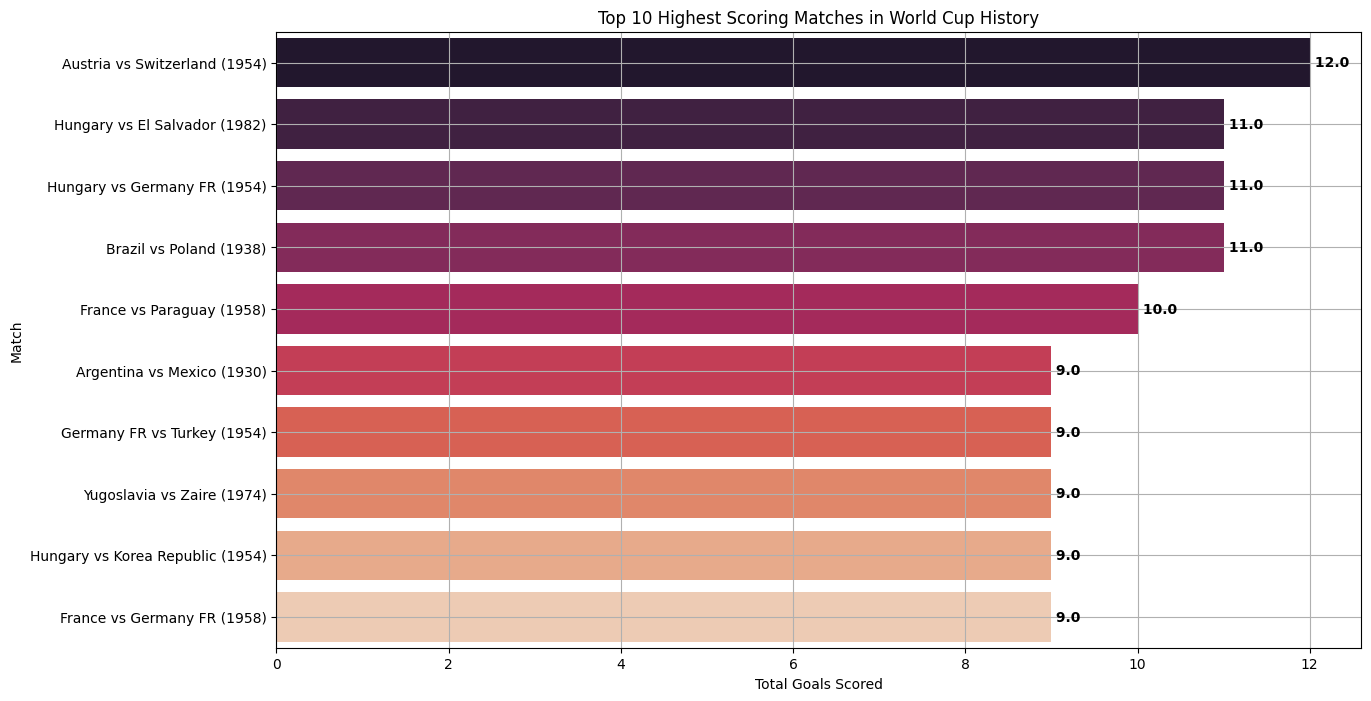

In [25]:
# Find matches with the highest total goals
top_scoring_matches = world_cup_matches.sort_values(by='TotalGoals', ascending=False).head(10)

# Print details of the top 10 highest scoring matches
print("Top 10 Highest Scoring Matches:")
print(top_scoring_matches[['Year', 'Datetime', 'Home Team Name', 'Home Team Goals', 'Away Team Name', 'Away Team Goals', 'TotalGoals']])

# Prepare data for visualization
top_scoring_matches['Match'] = top_scoring_matches.apply(
    lambda row: f"{row['Home Team Name']} vs {row['Away Team Name']} ({row['Year']})", axis=1
)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=top_scoring_matches, y='Match', x='TotalGoals', palette='rocket')
plt.title('Top 10 Highest Scoring Matches in World Cup History')
plt.xlabel('Total Goals Scored')
plt.ylabel('Match')
plt.grid(True)

# Annotate the bars with the total goals scored
for index, value in enumerate(top_scoring_matches['TotalGoals']):
    plt.text(value, index, f' {value}', color='black', va='center', fontweight='bold')

plt.show()

#### Historical Trends in Goals Scored and Conceded

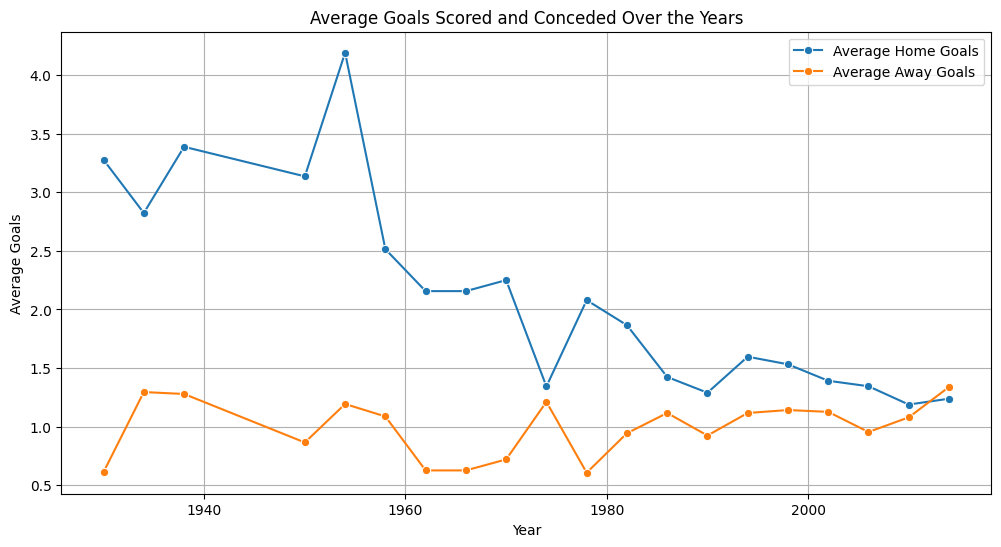

In [26]:
# Calculate average goals scored and conceded by year
average_goals_by_year = world_cup_matches.groupby('Year').agg({
    'Home Team Goals': 'mean',
    'Away Team Goals': 'mean'
}).rename(columns={'Home Team Goals': 'Avg Home Goals', 'Away Team Goals': 'Avg Away Goals'})

# Plot trends in goals scored and conceded
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_goals_by_year, x=average_goals_by_year.index, y='Avg Home Goals', marker='o', label='Average Home Goals')
sns.lineplot(data=average_goals_by_year, x=average_goals_by_year.index, y='Avg Away Goals', marker='o', label='Average Away Goals')
plt.title('Average Goals Scored and Conceded Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.grid(True)
plt.legend()
plt.show()

#### Penalties and Extra Time

Number of matches decided in extra time: 32
Number of matches decided by penalties: 30


C:\Users\administor\AppData\Local\Temp\ipykernel_14696\922302338.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=world_cup_matches, x=world_cup_matches['Win conditions'].str.contains('extra time|penalties', na=False), palette='autumn')


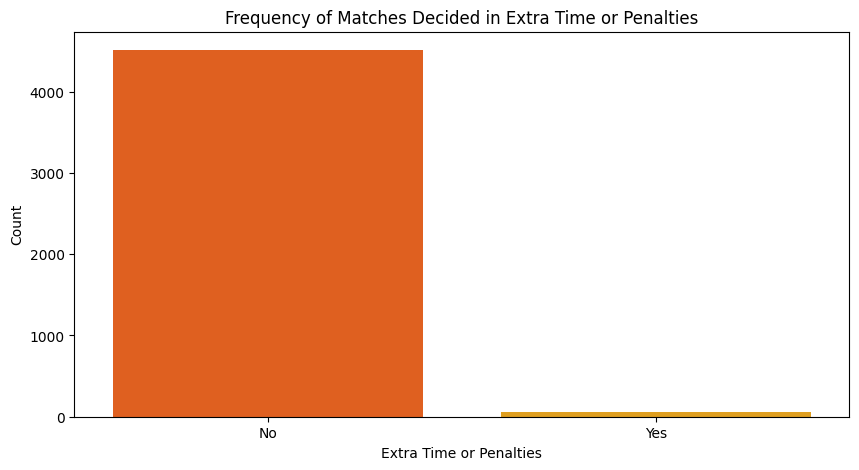

In [27]:
# Count matches that went into extra time or penalties
extra_time_matches = world_cup_matches[world_cup_matches['Win conditions'].str.contains('extra time', na=False)]
penalty_matches = world_cup_matches[world_cup_matches['Win conditions'].str.contains('penalties', na=False)]

print(f"Number of matches decided in extra time: {len(extra_time_matches)}")
print(f"Number of matches decided by penalties: {len(penalty_matches)}")

# Visualize frequency of matches going into extra time or penalties
plt.figure(figsize=(10, 5))
sns.countplot(data=world_cup_matches, x=world_cup_matches['Win conditions'].str.contains('extra time|penalties', na=False), palette='autumn')
plt.title('Frequency of Matches Decided in Extra Time or Penalties')
plt.xlabel('Extra Time or Penalties')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Host Country Performance


Host Country Performance Summary:
{'Total Matches': 99, 'Wins': 62, 'Draws': 18, 'Losses': 19}


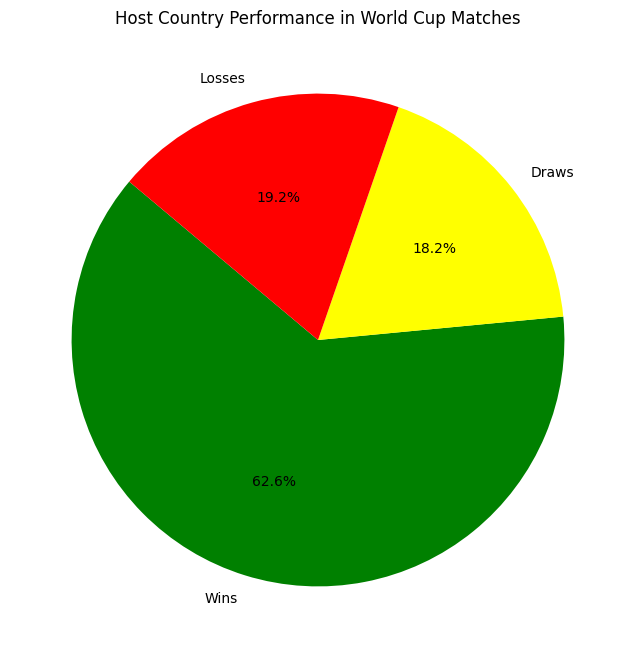

In [28]:
# Merge world_cups with world_cup_matches to get the host country performance in matches
host_performance = world_cup_matches.merge(world_cups[['Year', 'Country']], left_on='Year', right_on='Year', how='left')
host_performance['HostCountryMatch'] = (host_performance['Home Team Name'] == host_performance['Country']) | \
                                       (host_performance['Away Team Name'] == host_performance['Country'])

# Calculate the performance of host countries
host_country_results = host_performance[host_performance['HostCountryMatch']]

# Count wins, draws, and losses for host countries
host_wins = host_country_results[(host_country_results['Home Team Name'] == host_country_results['Country']) & \
                                 (host_country_results['Home Team Goals'] > host_country_results['Away Team Goals']) | \
                                 (host_country_results['Away Team Name'] == host_country_results['Country']) & \
                                 (host_country_results['Away Team Goals'] > host_country_results['Home Team Goals'])]

host_draws = host_country_results[host_country_results['Home Team Goals'] == host_country_results['Away Team Goals']]

host_losses = host_country_results[(host_country_results['Home Team Name'] == host_country_results['Country']) & \
                                   (host_country_results['Home Team Goals'] < host_country_results['Away Team Goals']) | \
                                   (host_country_results['Away Team Name'] == host_country_results['Country']) & \
                                   (host_country_results['Away Team Goals'] < host_country_results['Home Team Goals'])]

# Summary of host country performance
host_performance_summary = {
    'Total Matches': len(host_country_results),
    'Wins': len(host_wins),
    'Draws': len(host_draws),
    'Losses': len(host_losses)
}

print("\nHost Country Performance Summary:")
print(host_performance_summary)

# Visualize host country performance
labels = ['Wins', 'Draws', 'Losses']
sizes = [host_performance_summary['Wins'], host_performance_summary['Draws'], host_performance_summary['Losses']]
colors = ['green', 'yellow', 'red']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Host Country Performance in World Cup Matches')
plt.show()

#### Goals by Stage

C:\Users\administor\AppData\Local\Temp\ipykernel_14696\958353066.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_goals_by_stage.values, y=average_goals_by_stage.index, palette='Spectral')


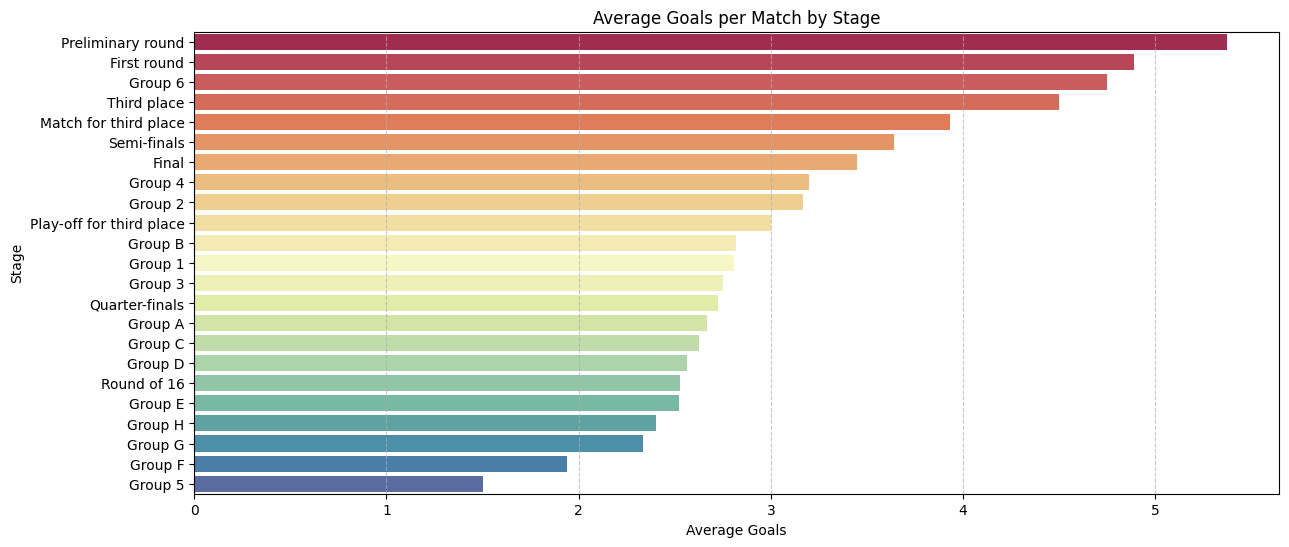

In [29]:
# Calculate the average goals per match by stage
average_goals_by_stage = world_cup_matches.groupby('Stage')['TotalGoals'].mean().sort_values(ascending=False)

# Visualize the average goals per match by stage
plt.figure(figsize=(14, 6))
sns.barplot(x=average_goals_by_stage.values, y=average_goals_by_stage.index, palette='Spectral')
plt.title('Average Goals per Match by Stage')
plt.xlabel('Average Goals')
plt.ylabel('Stage')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()